In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

Text(0.5, 1.0, 'Brightened Image')

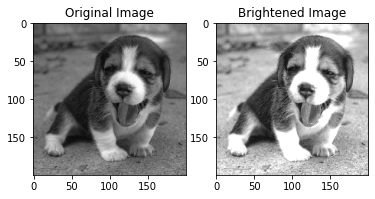

In [4]:
# QUESTION 1

dog_gray = cv2.imread('sample_images/dog.jpg', cv2.IMREAD_GRAYSCALE)
fig = plt.figure()
first_image = fig.add_subplot(1, 2, 1)
plt.imshow(dog_gray, cmap="gray")
first_image.set_title("Original Image") 

a = 1.5
b = 20
dog_gray2 = a * dog_gray + b

for x in range(0, 200):
    for y in range(0,200):
        if dog_gray2[x][y] < 0:
            dog_gray2[x][y] = 0
        elif dog_gray2[x][y] > 255:
            dog_gray2[x][y] = 255
 
second_image = fig.add_subplot(1, 2, 2)
plt.imshow(dog_gray2, cmap="gray")
second_image.set_title("Brightened Image") 

100.0


Text(0.5, 1.0, 'Vignette image')

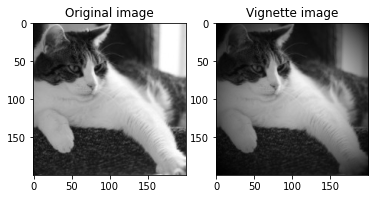

In [3]:
# QUESTION 2

gray = cv2.imread('sample_images/cat.JPG', cv2.IMREAD_GRAYSCALE)
fig = plt.figure()
firstimage = fig.add_subplot(1, 2, 1)
plt.imshow(gray, cmap="gray")
firstimage.set_title("Original image")

vignetting = gray

xcenter = gray.shape[0]/2
ycenter = gray.shape[1]/2
hypotenus = gray.shape[0]/2*gray.shape[0]/2+gray.shape[1]/2*gray.shape[1]/2

print(xcenter)
for x in range(0, gray.shape[0]):
    for y in range(0,gray.shape[1]):
        r = math.sqrt((x-xcenter)*(x-xcenter)+(y-ycenter)*(y-ycenter))
        if r == 0:
            a = 1
            b = 0
            vignetting[x,y] = a * vignetting[x,y] + b
        else:
            a = 1 - (r*r) / hypotenus
            b =  - (r*r) / hypotenus 
            vignetting[x,y] = a * vignetting[x,y] + b
        if vignetting[x, y] < 0:
            vignetting[x,y] = 0
        elif vignetting[x, y] > 255:
            vignetting[x, y] = 255

secondimage = fig.add_subplot(1, 2, 2)
plt.imshow(vignetting, cmap="gray")
secondimage.set_title("Vignette image")

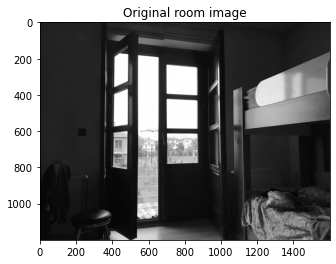

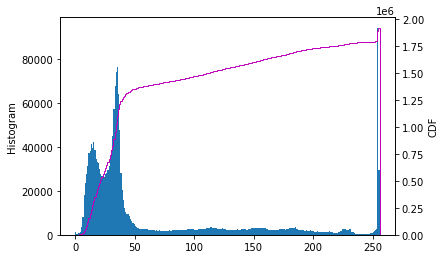

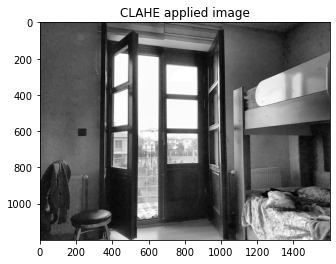

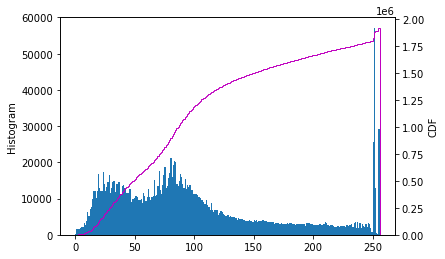

In [8]:
# QUESTION 3

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#ORIGINAL IMAGE
fig1 = plt.figure()
room_gray = cv2.imread('sample_images/room.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(room_gray, cmap="gray")
plt.title("Original room image")

fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()
histogram1 = ax1.hist(room_gray.ravel(),256,[0,256])
cdf1 = ax2.hist(room_gray.ravel(), 256,[0,256], cumulative=True, histtype='step', fc='k', ec='m',)
ax1.set_ylabel("Histogram")
ax2.set_ylabel("CDF")
plt.show()

#HISTOGRAM EQUALZATION
# fig2 = plt.figure()
# equ = cv2.equalizeHist(room_gray)
# plt.imshow(equ, cmap="gray")
# plt.title("Histogram equalized image")

# fig2, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# histogram2 = ax1.hist(equ.ravel(),256,[0,256])
# cdf1 = ax2.hist(equ.ravel(), 256,[0,256], cumulative=True, histtype='step', fc='k', ec='m',)
# ax1.set_ylabel("Histogram")
# ax2.set_ylabel("CDF")
# plt.show()

#CLAHE
fig3 = plt.figure()
clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(4,4))
cl1 = clahe.apply(room_gray)
plt.imshow(cl1, cmap="gray")
plt.title("CLAHE applied image")

fig3, ax1 = plt.subplots()
ax2 = ax1.twinx()
histogram2 = ax1.hist(cl1.ravel(),256,[0,256])
cdf1 = ax2.hist(cl1.ravel(), 256,[0,256], cumulative=True, histtype='step', fc='k', ec='m',)
ax1.set_ylabel("Histogram")
ax2.set_ylabel("CDF")
plt.show()